In [1]:
%matplotlib notebook

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [3]:
population_estimates = pd.read_csv("Population-EstimatesData.csv")
population_estimates.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
0,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,88.061110,89.489513,90.782451,91.898948,92.728007,93.201290,...,54.244434,54.356396,54.502067,54.676725,54.874161,55.102246,55.331887,55.562180,55.789065,56.009450
1,Arab World,ARB,"Age dependency ratio, old",SP.POP.DPND.OL,6.591951,6.700903,6.793279,6.867327,6.919224,6.947790,...,12.973244,13.345549,13.732773,14.132766,14.544481,14.946251,15.349197,15.755873,16.168726,16.589418
2,Arab World,ARB,"Age dependency ratio, young",SP.POP.DPND.YG,81.324186,82.626198,83.789155,84.767354,85.474209,85.872972,...,40.757181,40.542064,40.345297,40.162781,39.987572,39.845466,39.699291,39.546177,39.380479,39.197560
3,Arab World,ARB,"Age population, age 00, female, interpolated",SP.POP.AG00.FE.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Age population, age 00, male, interpolated",SP.POP.AG00.MA.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Set new index to Country Name
df = population_estimates.set_index("Country Name")
df.head()

,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
Country Name,,,,,,,,,,,,,,,,,,,,,
Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,88.061110,89.489513,90.782451,91.898948,92.728007,93.201290,94.087535,...,54.244434,54.356396,54.502067,54.676725,54.874161,55.102246,55.331887,55.562180,55.789065,56.009450
Arab World,ARB,"Age dependency ratio, old",SP.POP.DPND.OL,6.591951,6.700903,6.793279,6.867327,6.919224,6.947790,7.015592,...,12.973244,13.345549,13.732773,14.132766,14.544481,14.946251,15.349197,15.755873,16.168726,16.589418
Arab World,ARB,"Age dependency ratio, young",SP.POP.DPND.YG,81.324186,82.626198,83.789155,84.767354,85.474209,85.872972,86.674248,...,40.757181,40.542064,40.345297,40.162781,39.987572,39.845466,39.699291,39.546177,39.380479,39.197560
Arab World,ARB,"Age population, age 00, female, interpolated",SP.POP.AG00.FE.IN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arab World,ARB,"Age population, age 00, male, interpolated",SP.POP.AG00.MA.IN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Grab the eight regions we'll be using
reduced_df = df.loc[["Central Europe and the Baltics", "East Asia & Pacific", "European Union",
                                "Latin America & Caribbean", "Middle East & North Africa", "South Asia", "Sub-Saharan Africa", "United States"]]
reduced_df

,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
Country Name,,,,,,,,,,,,,,,,,,,,,
Central Europe and the Baltics,CEB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,5.741188e+01,5.752730e+01,5.728712e+01,5.677139e+01,5.614491e+01,5.551517e+01,5.471579e+01,...,6.521464e+01,6.646455e+01,6.776753e+01,6.906237e+01,7.031534e+01,7.158719e+01,7.275529e+01,7.386537e+01,7.498979e+01,7.617579e+01
Central Europe and the Baltics,CEB,"Age dependency ratio, old",SP.POP.DPND.OL,1.134335e+01,1.164324e+01,1.195043e+01,1.225932e+01,1.256735e+01,1.287642e+01,1.319988e+01,...,4.318770e+01,4.425557e+01,4.535228e+01,4.642422e+01,4.744606e+01,4.845903e+01,4.936855e+01,5.021531e+01,5.107022e+01,5.198438e+01
Central Europe and the Baltics,CEB,"Age dependency ratio, young",SP.POP.DPND.YG,4.587778e+01,4.567246e+01,4.512306e+01,4.431009e+01,4.339136e+01,4.246881e+01,4.137372e+01,...,2.198657e+01,2.217074e+01,2.237985e+01,2.260623e+01,2.284224e+01,2.310576e+01,2.336620e+01,2.362480e+01,2.388381e+01,2.414218e+01
Central Europe and the Baltics,CEB,"Age population, age 00, female, interpolated",SP.POP.AG00.FE.IN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Central Europe and the Baltics,CEB,"Age population, age 00, male, interpolated",SP.POP.AG00.MA.IN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
United States,USA,Rural population growth (annual %),SP.RUR.TOTL.ZG,-1.953745e-02,3.797679e-01,2.469108e-01,1.415862e-01,8.493718e-02,-6.049969e-02,-1.623757e-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
United States,USA,Sex ratio at birth (male births per female bir...,SP.POP.BRTH.MF,NaN,NaN,1.050000e+00,NaN,NaN,NaN,NaN,...,NaN,1.047000e+00,NaN,NaN,NaN,NaN,1.047000e+00,NaN,NaN,NaN
United States,USA,Urban population,SP.URB.TOTL,1.264625e+08,1.292762e+08,1.319887e+08,1.346154e+08,1.372160e+08,1.396631e+08,1.420087e+08,...,3.262880e+08,3.284070e+08,3.305070e+08,3.325870e+08,3.346630e+08,3.367340e+08,3.388110e+08,3.408870e+08,3.429730e+08,3.450350e+08


In [6]:
#Move the Country Name index back into a column
reduced_df2 = reduced_df.reset_index(level='Country Name')
reduced_df2

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
0,Central Europe and the Baltics,CEB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,5.741188e+01,5.752730e+01,5.728712e+01,5.677139e+01,5.614491e+01,5.551517e+01,...,6.521464e+01,6.646455e+01,6.776753e+01,6.906237e+01,7.031534e+01,7.158719e+01,7.275529e+01,7.386537e+01,7.498979e+01,7.617579e+01
1,Central Europe and the Baltics,CEB,"Age dependency ratio, old",SP.POP.DPND.OL,1.134335e+01,1.164324e+01,1.195043e+01,1.225932e+01,1.256735e+01,1.287642e+01,...,4.318770e+01,4.425557e+01,4.535228e+01,4.642422e+01,4.744606e+01,4.845903e+01,4.936855e+01,5.021531e+01,5.107022e+01,5.198438e+01
2,Central Europe and the Baltics,CEB,"Age dependency ratio, young",SP.POP.DPND.YG,4.587778e+01,4.567246e+01,4.512306e+01,4.431009e+01,4.339136e+01,4.246881e+01,...,2.198657e+01,2.217074e+01,2.237985e+01,2.260623e+01,2.284224e+01,2.310576e+01,2.336620e+01,2.362480e+01,2.388381e+01,2.414218e+01
3,Central Europe and the Baltics,CEB,"Age population, age 00, female, interpolated",SP.POP.AG00.FE.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Central Europe and the Baltics,CEB,"Age population, age 00, male, interpolated",SP.POP.AG00.MA.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,United States,USA,Rural population growth (annual %),SP.RUR.TOTL.ZG,-1.953745e-02,3.797679e-01,2.469108e-01,1.415862e-01,8.493718e-02,-6.049969e-02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1396,United States,USA,Sex ratio at birth (male births per female bir...,SP.POP.BRTH.MF,NaN,NaN,1.050000e+00,NaN,NaN,NaN,...,NaN,1.047000e+00,NaN,NaN,NaN,NaN,1.047000e+00,NaN,NaN,NaN
1397,United States,USA,Urban population,SP.URB.TOTL,1.264625e+08,1.292762e+08,1.319887e+08,1.346154e+08,1.372160e+08,1.396631e+08,...,3.262880e+08,3.284070e+08,3.305070e+08,3.325870e+08,3.346630e+08,3.367340e+08,3.388110e+08,3.408870e+08,3.429730e+08,3.450350e+08
1398,United States,USA,Urban population (% of total population),SP.URB.TOTL.IN.ZS,6.999600e+01,7.037700e+01,7.075700e+01,7.113400e+01,7.150800e+01,7.187900e+01,...,8.735200e+01,8.756400e+01,8.777400e+01,8.798000e+01,8.818400e+01,8.838400e+01,8.858200e+01,8.877600e+01,8.896800e+01,8.915600e+01


In [7]:
# Set new index to Indicator Name
reduced_df3 = reduced_df2.set_index("Indicator Name")
reduced_df3.head()

,Country Name,Country Code,Indicator Code,1960,1961,1962,1963,1964,1965,1966,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
Indicator Name,,,,,,,,,,,,,,,,,,,,,
Age dependency ratio (% of working-age population),Central Europe and the Baltics,CEB,SP.POP.DPND,57.411876,57.527304,57.287119,56.771392,56.144914,55.515174,54.715793,...,65.214644,66.464551,67.767528,69.062370,70.315340,71.587189,72.755291,73.865371,74.989787,76.175794
"Age dependency ratio, old",Central Europe and the Baltics,CEB,SP.POP.DPND.OL,11.343346,11.643242,11.950425,12.259320,12.567347,12.876417,13.199878,...,43.187701,44.255566,45.352282,46.424219,47.446057,48.459026,49.368546,50.215312,51.070216,51.984375
"Age dependency ratio, young",Central Europe and the Baltics,CEB,SP.POP.DPND.YG,45.877783,45.672459,45.123065,44.310088,43.391358,42.468807,41.373717,...,21.986570,22.170741,22.379851,22.606232,22.842236,23.105764,23.366196,23.624801,23.883808,24.142179
"Age population, age 00, female, interpolated",Central Europe and the Baltics,CEB,SP.POP.AG00.FE.IN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Age population, age 00, male, interpolated",Central Europe and the Baltics,CEB,SP.POP.AG00.MA.IN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Grab the fertility rate births per woman rows
reduced_df4 = reduced_df3.loc[["Fertility rate, total (births per woman)"]]
reduced_df4.head()

,Country Name,Country Code,Indicator Code,1960,1961,1962,1963,1964,1965,1966,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
Indicator Name,,,,,,,,,,,,,,,,,,,,,
"Fertility rate, total (births per woman)",Central Europe and the Baltics,CEB,SP.DYN.TFRT.IN,2.497094,2.400683,2.309179,2.313874,2.258712,2.198710,2.118629,...,NaN,NaN,NaN,NaN,1.67,NaN,NaN,NaN,NaN,1.69
"Fertility rate, total (births per woman)",East Asia & Pacific,EAS,SP.DYN.TFRT.IN,5.396406,5.471164,5.545254,5.619571,5.677623,5.716044,5.645718,...,NaN,NaN,NaN,NaN,1.79,NaN,NaN,NaN,NaN,1.79
"Fertility rate, total (births per woman)",European Union,EUU,SP.DYN.TFRT.IN,2.583469,2.594764,2.590291,2.623556,2.654006,2.596572,2.556209,...,NaN,NaN,NaN,NaN,1.69,NaN,NaN,NaN,NaN,1.70
"Fertility rate, total (births per woman)",Latin America & Caribbean,LCN,SP.DYN.TFRT.IN,5.882839,5.871677,5.848203,5.810980,5.759644,5.693373,5.613752,...,NaN,NaN,NaN,NaN,1.75,NaN,NaN,NaN,NaN,1.74
"Fertility rate, total (births per woman)",Middle East & North Africa,MEA,SP.DYN.TFRT.IN,6.906806,6.921688,6.933832,6.940577,6.940658,6.931592,6.911719,...,NaN,NaN,NaN,NaN,2.22,NaN,NaN,NaN,NaN,2.16


In [9]:
#Move the Indicator Name index back into a column
reduced_df5 = reduced_df4.reset_index(level='Indicator Name')
reduced_df5.head()

,Indicator Name,Country Name,Country Code,Indicator Code,1960,1961,1962,1963,1964,1965,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
0,"Fertility rate, total (births per woman)",Central Europe and the Baltics,CEB,SP.DYN.TFRT.IN,2.497094,2.400683,2.309179,2.313874,2.258712,2.198710,...,NaN,NaN,NaN,NaN,1.67,NaN,NaN,NaN,NaN,1.69
1,"Fertility rate, total (births per woman)",East Asia & Pacific,EAS,SP.DYN.TFRT.IN,5.396406,5.471164,5.545254,5.619571,5.677623,5.716044,...,NaN,NaN,NaN,NaN,1.79,NaN,NaN,NaN,NaN,1.79
2,"Fertility rate, total (births per woman)",European Union,EUU,SP.DYN.TFRT.IN,2.583469,2.594764,2.590291,2.623556,2.654006,2.596572,...,NaN,NaN,NaN,NaN,1.69,NaN,NaN,NaN,NaN,1.70
3,"Fertility rate, total (births per woman)",Latin America & Caribbean,LCN,SP.DYN.TFRT.IN,5.882839,5.871677,5.848203,5.810980,5.759644,5.693373,...,NaN,NaN,NaN,NaN,1.75,NaN,NaN,NaN,NaN,1.74
4,"Fertility rate, total (births per woman)",Middle East & North Africa,MEA,SP.DYN.TFRT.IN,6.906806,6.921688,6.933832,6.940577,6.940658,6.931592,...,NaN,NaN,NaN,NaN,2.22,NaN,NaN,NaN,NaN,2.16


In [10]:
# Create a new dataframe with all the columns we'll be using
organized_df = reduced_df5[["Country Name","1970","1975","1980","1985","1990","1995","2000","2005","2010","2015","2020","2025","2030","2035","2040","2045","2050"]]
organized_df.head()

,Country Name,1970,1975,1980,1985,1990,1995,2000,2005,2010,2015,2020,2025,2030,2035,2040,2045,2050
0,Central Europe and the Baltics,2.29,2.34,2.19,2.16,1.93,1.47,1.32,1.31,1.47,1.45,1.54,1.57,1.60,1.63,1.65,1.67,1.69
1,East Asia & Pacific,5.26,3.93,2.98,2.83,2.47,1.96,1.85,1.81,1.82,1.83,1.83,1.82,1.81,1.81,1.80,1.79,1.79
2,European Union,2.36,2.06,1.87,1.73,1.66,1.45,1.46,1.50,1.61,1.57,1.58,1.61,1.63,1.65,1.67,1.69,1.70
3,Latin America & Caribbean,5.21,4.69,4.19,3.69,3.26,2.92,2.63,2.36,2.19,2.09,1.99,1.91,1.85,1.81,1.77,1.75,1.74
4,Middle East & North Africa,6.73,6.44,6.23,5.79,4.88,3.87,3.19,2.90,2.90,2.89,2.74,2.60,2.48,2.38,2.30,2.22,2.16


In [11]:
# Set new index to Country Name
organized_df2 = organized_df.set_index("Country Name")
organized_df2

,1970,1975,1980,1985,1990,1995,2000,2005,2010,2015,2020,2025,2030,2035,2040,2045,2050
Country Name,,,,,,,,,,,,,,,,,
Central Europe and the Baltics,2.29,2.34,2.19,2.16,1.93,1.47,1.32,1.31,1.47,1.45,1.54,1.57,1.60,1.63,1.65,1.67,1.69
East Asia & Pacific,5.26,3.93,2.98,2.83,2.47,1.96,1.85,1.81,1.82,1.83,1.83,1.82,1.81,1.81,1.80,1.79,1.79
European Union,2.36,2.06,1.87,1.73,1.66,1.45,1.46,1.50,1.61,1.57,1.58,1.61,1.63,1.65,1.67,1.69,1.70
Latin America & Caribbean,5.21,4.69,4.19,3.69,3.26,2.92,2.63,2.36,2.19,2.09,1.99,1.91,1.85,1.81,1.77,1.75,1.74
Middle East & North Africa,6.73,6.44,6.23,5.79,4.88,3.87,3.19,2.90,2.90,2.89,2.74,2.60,2.48,2.38,2.30,2.22,2.16
South Asia,5.79,5.46,5.12,4.76,4.30,3.89,3.51,3.14,2.75,2.47,2.34,2.22,2.12,2.04,1.97,1.92,1.88
Sub-Saharan Africa,6.74,6.80,6.77,6.64,6.35,6.02,5.76,5.52,5.26,4.91,4.56,4.24,3.95,3.69,3.46,3.26,3.08
United States,2.48,1.77,1.84,1.84,2.08,1.98,2.06,2.06,1.93,1.84,1.77,1.79,1.80,1.80,1.80,1.80,1.81


In [12]:
# Create a series for 1970-2050
series1 = organized_df2.loc["Central Europe and the Baltics"]
series2 = organized_df2.loc["East Asia & Pacific"]
series3 = organized_df2.loc["European Union"]
series4 = organized_df2.loc["Latin America & Caribbean"]
series5 = organized_df2.loc["Middle East & North Africa"]
series6 = organized_df2.loc["South Asia"]
series7 = organized_df2.loc["Sub-Saharan Africa"]
series8 = organized_df2.loc["United States"]

<IPython.core.display.Javascript object>


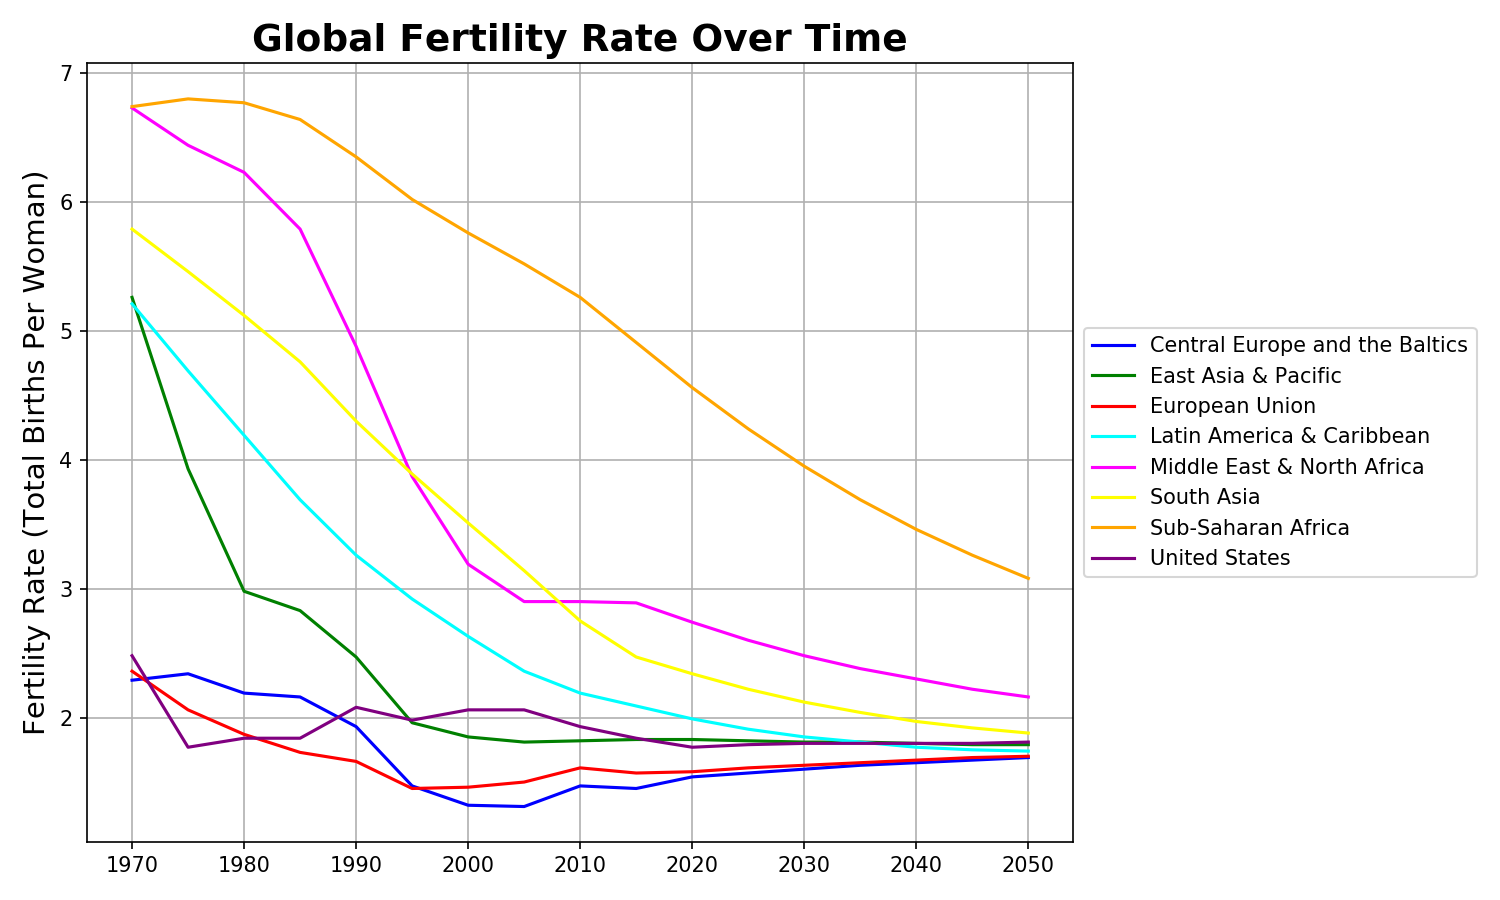

In [13]:
# Create a list of the years that we will use as our x axis
years = [1970,1975,1980,1985,1990,1995,2000,2005,2010,2015,2020,2025,2030,2035,2040,2045,2050]
plt.figure(figsize=(10,6))
# Plot line
plt.plot(years, series1, color="blue", label="Central Europe and the Baltics")
plt.plot(years, series2, color="green", label="East Asia & Pacific")
plt.plot(years, series3, color="red", label="European Union")
plt.plot(years, series4, color="cyan", label="Latin America & Caribbean")
plt.plot(years, series5, color="magenta", label="Middle East & North Africa")
plt.plot(years, series6, color="yellow", label="South Asia")
plt.plot(years, series7, color="orange", label="Sub-Saharan Africa")
plt.plot(years, series8, color="purple", label="United States")

# Place a legend on the chart
plt.legend(loc="best")
plt.title('Global Fertility Rate Over Time', fontdict={'fontweight':'bold', 'fontsize': 18})
plt.ylabel("Fertility Rate (Total Births Per Woman)", fontsize=14)
legend = plt.legend(loc="best")
legend.get_frame().set_facecolor('none')
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.grid(True)
#Save the plotted figures as .pngs
plt.savefig("fertility_over_time.png")

# Print our chart to the screen
plt.show()

### Question: 
### How does the fertility rate change between regions between 1970-2020?

* Fertility Rate (Total Births Per Woman) Declines Dramatically 1970-2000.
* However fertility remains steady between 1.5-2 children per woman for five out of eight regions by around 2020 with South Asia catching up by 2040.
* The Middle East and North Africa isn't far behind however and has just over two children by 2050, and Sub Saharan Africa has three children per woman by 2050, but is still on a downward trend.
* East Asia & the Pacific has the most dramtic drop in 30 years with just over 5 children per woman in 1970, to less than two children by 2000.  
* Latin America & the Carribbean is similar with just over five children per woman in 1970 as well, and by 2020 it too is down to two children per woman.
* The European Union, Central Europe and the Baltics, and the United States were all just above two children per woman in 1970 with the European Union and Central Europe and the Baltics dropping to less than two children by the next decade, and the U.S. hovering around two children per woman until 2010 where they too finally dropped below and now remains steady.